In [2]:
from netCDF4 import Dataset

import glob

import numpy as np
from time import sleep
from matplotlib import pyplot as plt

In [3]:
plt.ion()

In [4]:
cmct_dir = 'data/GLAS_Data/2005'
cmct_files = glob.glob(cmct_dir + '/*final.nc')

In [5]:
zoom_bounds = None
zoom_bounds = [310, 320, 75, 80]
#zoom_bounds = [312.0, 312.1, 78.05, 78.10]

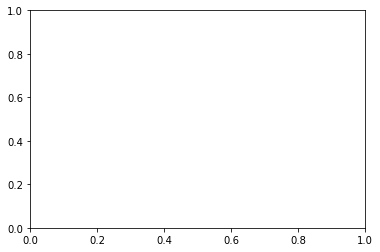

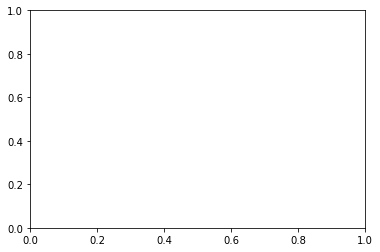

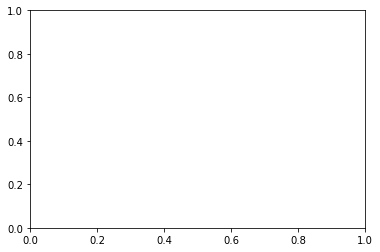

In [6]:
fig_height, ax_height = plt.subplots()
fig_diff, ax_diff = plt.subplots()
fig_dem, ax_dem = plt.subplots()

In [7]:
# %matplotlib widget

def create_coords(files):
    LON_DEGE = list()
    LAT_DEGN = list()
    WGS84ELEV_M = list()
    DEM_M  = list()
    for i_file, cmct_file in enumerate(files):
    #     print('plotting file {:4d} / {:4d}: {:s}'.format(i_file, len(cmct_files), cmct_file))
        ncfile = Dataset(cmct_file, 'r')
    
        if zoom_bounds:
            idx = (ncfile['LON_DEGE'][:] > zoom_bounds[0]) & (ncfile['LON_DEGE'][:] < zoom_bounds[1]) & \
                  (ncfile['LAT_DEGN'][:] > zoom_bounds[2]) & (ncfile['LAT_DEGN'][:] < zoom_bounds[3])
        else:
            idx = np.arange(len(ncfile['LON_DEGE'][:]))
    
        if np.sum(idx) > 0:
            LON_DEGE.extend(ncfile['LON_DEGE'][idx])
            LAT_DEGN.extend(ncfile['LAT_DEGN'][idx])
            WGS84ELEV_M.extend(ncfile['WGS84ELEV_M'][idx])
            DEM_M.extend(ncfile['DEM_M'][idx])
            #for i in np.where(idx)[0]:
            #    print('{:5.0f} {:5.0f} {:5.0f}'.format(ncfile['WGS84ELEV_M'][i], ncfile['DEM_M'][i], ncfile['WGS84ELEV_M'][i]-ncfile['DEM_M'][i]))
    
    LON_DEGE = np.array(LON_DEGE)
    LAT_DEGN = np.array(LAT_DEGN)
    WGS84ELEV_M = np.array(WGS84ELEV_M)
    DEM_M = np.array(DEM_M)
    
    ax_height = fig_height.subplots()
    ax_diff = fig_diff.subplots()
    ax_dem = fig_dem.subplots()
    sc_height = ax_height.scatter(LON_DEGE, LAT_DEGN, 3., c=WGS84ELEV_M,       cmap='magma')
    sc_diff   = ax_diff.scatter(  LON_DEGE, LAT_DEGN, 3., c=WGS84ELEV_M-DEM_M, cmap='coolwarm', vmin=-100, vmax=+100)
    sc_dem    = ax_dem.scatter(   LON_DEGE, LAT_DEGN, 3., c=DEM_M,             cmap='magma')
    fig_height.colorbar(sc_height)
    fig_diff.colorbar(sc_diff)
    fig_dem.colorbar(sc_dem)
    
    fig_height.draw()
    fig_diff.draw()
    fig_dem.draw()

Processing files: 0 to 5
data/GLAS_Data/2005/GLA12_634_2111_003_0029_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_003_0071_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_003_0281_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_002_0323_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_001_1317_0_01_0001.CMCT.final.nc


TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

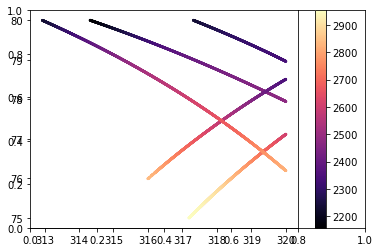

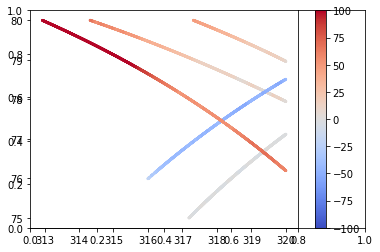

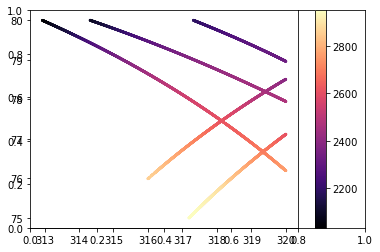

In [8]:
# %matplotlib widget

fig_height, ax_height = plt.subplots()
fig_diff, ax_diff = plt.subplots()
fig_dem, ax_dem = plt.subplots()


for i in range(1, len(cmct_files)):
#     a = input()
    lb = i*5 - 5
    ub = i*5
    
    print(f'Processing files: {lb} to {ub}')
    print(*cmct_files[lb:ub], sep = "\n")

    create_coords(cmct_files[lb:ub])
    plt.show()
    sleep(2)
    fig_height.clear()
    fig_dem.clear()
    fig_diff.clear()

Processing files: 0 to 5
data/GLAS_Data/2005/GLA12_634_2111_003_0029_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_003_0071_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_003_0281_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_002_0323_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_001_1317_0_01_0001.CMCT.final.nc


TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

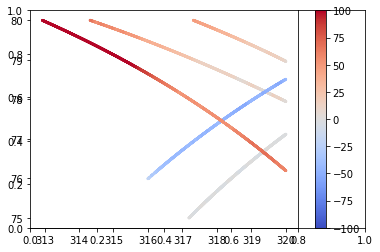

In [12]:
# 001_1317 Notes: Intersection difference is more then 50 meters. Colors are light blue and orange/red. 
# 002_0323 Notes: Light gray/white line that intersects with the orange/red 001_1317 track. Also more then 50 meters difference as well. 
# 003_0281 Notes: Does not even show up on the plot. No seen interaction with the tracks. Could be cloud coverage. 
# 004_0071 Notes: Intersection with light blue track of 001_1317. This track is a grayish/tan tone. Most likely around 10-20 meter difference. 
# 003_0029 Notes: Does not show up on the plots. 

#This range was lb = i*5 - 5 and ub = i*5


fig_diff, ax_diff = plt.subplots()



for i in range(1, len(cmct_files)):
#     a = input()
    lb = i*5 - 5
    ub = i*5
    
    print(f'Processing files: {lb} to {ub}')
    print(*cmct_files[lb:ub], sep = "\n")

    create_coords(cmct_files[lb:ub])
    plt.show()
    sleep(2)
    fig_diff.clear()

Processing files: 5 to 10
data/GLAS_Data/2005/GLA12_634_2111_002_0113_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_002_0295_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2113_002_0127_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2113_001_1303_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_002_0141_0_01_0001.CMCT.final.nc


TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

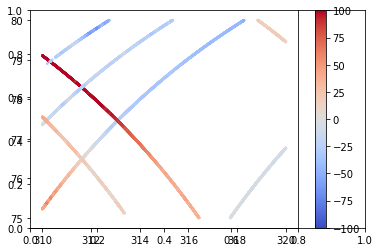

In [13]:
# 002_0141 Notes: Only one blue line. It slightly disappears in is a few small spots (Possibly cloud coverage). Overall it looks be consisent with 0 to -50 meters. 
# 001_1303 Notes: A three tracks on the plot. Light gray (bottom right), tan (upper right), and light blue (upper left). No intersections. 
# 002_0127 Notes: Two more tracks appear that breifly intersect. The tanish tone one is around 10-15 meters while the light blue/gray is around -5 meters. So there is a 15 to 20 meter difference.
# 002_295 Notes: There doesn't seem to be any tracks that appear. It could be on top of another track. 
# 002_0113 Notes: Dark red to orange track. There is a lighter blue track that appears and turns tan/orange as it gets closer to the red track. This blue track might be 002_0141 track that is altered as more data is added. 
        # Intersection: Dark Red is around 80 meters. Blue track is around -10 meters. So there is probably a 90 meters difference. 

# This range was lb = i*10 -5 and ub = i*1
fig_diff, ax_diff = plt.subplots()


for i in range(1, len(cmct_files)):
#     a = input()
    lb = i*10 - 5
    ub = i*10
    
    print(f'Processing files: {lb} to {ub}')
    print(*cmct_files[lb:ub], sep = "\n")

    create_coords(cmct_files[lb:ub])
    plt.show()
    sleep(2)
    fig_diff.clear()


Processing files: 12 to 15
data/GLAS_Data/2005/GLA12_634_2113_002_0211_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_003_0001_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2113_002_0309_0_01_0001.CMCT.final.nc


TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

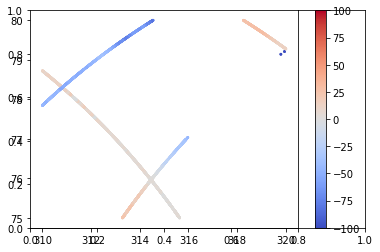

In [23]:
# 002_0309 Notes: One long line. Around 10-20 meters. No other tracks. It disappears when other files are implimented into the loop. 
# 003_0001 Notes: Three tracks show up, there is a intersection. Upper tan track is between 10-25 meters. The intersection is a blue track and a gray-ish tan color.
    # Blue Track: -30 meters
    # Gray-ish Tan Track: 5 meters
    # Total Distance: 35 meters
# 002_0211 Notes: A new track appears. And there seems to be a brief dotted section that is deep blue, -80 to -90. That section is probably part of the new track. 
    # Upper section of track is blue then it slowly changes to the gray-ish tan color at the intersection with 003_0001.
    # Intersection of 002


fig_diff, ax_diff = plt.subplots()



for i in range(1, len(cmct_files)):
#     a = input()
    lb = i*15 - 3
    ub = i*15
    
    print(f'Processing files: {lb} to {ub}')
    print(*cmct_files[lb:ub], sep = "\n")

    create_coords(cmct_files[lb:ub])
    plt.show()
    sleep(2)
    fig_height.clear()
    fig_dem.clear()
    fig_diff.clear()